In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131323 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!pip install face_recognition

    100% |████████████████████████████████| 100.2MB 273kB/s 
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [4]:
!pip install imutils

In [0]:
# import the necessary packages
from imutils import paths
import face_recognition
import argparse
import pickle
import cv2
import os

In [6]:
# grab the paths to the input images in our dataset
print("[INFO] quantifying faces...")
#imagePaths = '/content/gdrive/My Drive/app/Face_Recognition_PyImage/datatqm'
imagePaths = list(paths.list_images('/content/gdrive/My Drive/app/Face_Recognition_PyImage/datatqm')) 
# initialize the list of known encodings and known names
knownEncodings = []
knownNames = []

[INFO] quantifying faces...


In [7]:
print(imagePaths)
# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
  # extract the person name from the image path
  print("[INFO] processing image {}/{}".format(i + 1,len(imagePaths)))
  

  name = imagePath.split(os.path.sep)[-2]
	# load the input image and convert it from BGR (OpenCV ordering)
	# to dlib ordering (RGB)
  print("d"+name)
  image = cv2.imread(imagePath)
  #image = np.array(image, dtype=np.uint8)
  rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  
	# detect the (x, y)-coordinates of the bounding boxes
	# corresponding to each face in the input image
  boxes = face_recognition.face_locations(rgb,model='cnn')
 
	# compute the facial embedding for the face
  encodings = face_recognition.face_encodings(rgb, boxes)
 
	# loop over the encodings
  for encoding in encodings:
		# add each encoding + name to our set of known names and
		# encodings
    knownEncodings.append(encoding)
    knownNames.append(name)
    
# dump the facial encodings + names to disk
print("[INFO] serializing encodings...")
data = {"encodings": knownEncodings, "names": knownNames}
f = open('/content/gdrive/My Drive/app/Face_Recognition_PyImage/output/encodingstqm.pickle', "wb")
f.write(pickle.dumps(data))
f.close()

['/content/gdrive/My Drive/app/Face_Recognition_PyImage/datatqm/Moon/93.png', '/content/gdrive/My Drive/app/Face_Recognition_PyImage/datatqm/Moon/59.png', '/content/gdrive/My Drive/app/Face_Recognition_PyImage/datatqm/Moon/7.png', '/content/gdrive/My Drive/app/Face_Recognition_PyImage/datatqm/Moon/0.png', '/content/gdrive/My Drive/app/Face_Recognition_PyImage/datatqm/Moon/39.png', '/content/gdrive/My Drive/app/Face_Recognition_PyImage/datatqm/Moon/70.png', '/content/gdrive/My Drive/app/Face_Recognition_PyImage/datatqm/Moon/61.png', '/content/gdrive/My Drive/app/Face_Recognition_PyImage/datatqm/Moon/54.png', '/content/gdrive/My Drive/app/Face_Recognition_PyImage/datatqm/Moon/45.png', '/content/gdrive/My Drive/app/Face_Recognition_PyImage/datatqm/Moon/73.png', '/content/gdrive/My Drive/app/Face_Recognition_PyImage/datatqm/Moon/91.png', '/content/gdrive/My Drive/app/Face_Recognition_PyImage/datatqm/Moon/65.png', '/content/gdrive/My Drive/app/Face_Recognition_PyImage/datatqm/Moon/2.png', '

[INFO] loading encodings...
[INFO] recognizing faces...
finish...


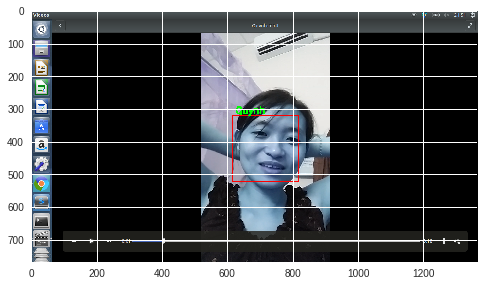

In [26]:
#STEP 2: Recognizing faces in images
# import the necessary packages
import face_recognition
import argparse
import pickle
import cv2
# load the known faces and embeddings
print("[INFO] loading encodings...")
data = pickle.loads(open("/content/gdrive/My Drive/app/Face_Recognition_PyImage/output/encodingstqm.pickle", "rb").read())

# load the input image and convert it from BGR to RGB
image = cv2.imread("/content/gdrive/My Drive/app/Face_Recognition_PyImage/q.png")
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print("[INFO] recognizing faces...")
boxes = face_recognition.face_locations(rgb,
	model="cnn")
encodings = face_recognition.face_encodings(rgb, boxes)


# initialize the list of names for each face detected
names = []
# loop over the facial embeddings
for encoding in encodings:
	# attempt to match each face in the input image to our known
	# encodings
	matches = face_recognition.compare_faces(data["encodings"],
		encoding)
	name = "Unknown"
  	# check to see if we have found a match
	if True in matches:
		# find the indexes of all matched faces then initialize a
		# dictionary to count the total number of times each face
		# was matched
		matchedIdxs = [i for (i, b) in enumerate(matches) if b]
		counts = {}
 
		# loop over the matched indexes and maintain a count for
		# each recognized face face
		for i in matchedIdxs:
			name = data["names"][i]
			counts[name] = counts.get(name, 0) + 1
 
		# determine the recognized face with the largest number of
		# votes (note: in the event of an unlikely tie Python will
		# select first entry in the dictionary)
		name = max(counts, key=counts.get)
	
	# update the list of names
	names.append(name)
print("finish...")


import matplotlib.pyplot as plt
# loop over the recognized faces
for ((top, right, bottom, left), name) in zip(boxes, names):
	# draw the predicted face name on the image
	cv2.rectangle(image, (left, top), (right, bottom), (255, 0, 0), 2)
	y = top - 15 if top - 15 > 15 else top + 15
	cv2.putText(image, name, (left+10, y+10), cv2.FONT_HERSHEY_SIMPLEX,
		0.95, (0, 255, 0), 4)
 
# show the output image
import numpy as np
cv2.imwrite('/content/gdrive/My Drive/app/Face_Recognition_PyImage/034.png',image)
plt.imshow(image)
plt.show()